PART 1 AMY

In [3]:
import gmaps
import pandas as pd
import numpy as np
import json
import seaborn
import requests
import matplotlib.pyplot as plt

# Google developer API key
from api_key import gmap_api

# Access maps with unique API key
gmaps.configure(api_key=gmap_api)

==============TEXAS=====================

In [5]:
#read in combined csvfile
tx_agencies_df = pd.read_csv("../data/cleandata/tx_combined_2004-2015.csv")
tx_ike_df = tx_agencies_df.loc[tx_agencies_df["report_year"] == 2008, :]

#drop records where lat or long is Null
clean_tx_agencies_df = tx_agencies_df.dropna(subset = ['icpsr_lat', 'icpsr_lng'])

#limit  data to year of natural disaster
ike_agencies_pd = clean_tx_agencies_df.loc[clean_tx_agencies_df["report_year"] == 2008, :]

# show only participating agencies
part_ike_agencies_df = ike_agencies_pd.loc[ike_agencies_pd["nibrs_months_reported"] == 12, :]
part_ike_agencies_df = pd.DataFrame(part_ike_agencies_df)

In [6]:
# Store 'Lat' and 'Lng' into  locations 
part_tx_locations = part_ike_agencies_df[["icpsr_lat", "icpsr_lng"]].astype(float)
part_tx_locations.head()

,icpsr_lat,icpsr_lng
4310,32.486397,-94.816276
4311,32.898054,-96.404396
4339,30.299402,-95.504008
4370,33.194745,-96.579846
4381,33.611469,-101.819944


In [7]:
# Store 'Lat' and 'Lng' into  locations 
tx_locations = ike_agencies_pd[["icpsr_lat", "icpsr_lng"]].astype(float)
tx_locations.head()

,icpsr_lat,icpsr_lng
4308,33.614159,-100.250548
4309,34.057899,-100.793152
4310,32.486397,-94.816276
4311,32.898054,-96.404396
4312,32.766987,-96.778424


In [8]:
#get totals for reports
all_years = tx_agencies_df.count()
all = all_years.max()

clean_all_years = clean_tx_agencies_df.count()
clean = clean_all_years.max()

tx_agencies = tx_ike_df.count()
tx = tx_agencies.max()

clean_ike = ike_agencies_pd.count()
ike = clean_ike.max()

part_ike = part_ike_agencies_df.count()
part = part_ike.max()

coord_part = part_tx_locations.count()
part_loc = coord_part.max()

coord_tx = tx_locations.count()
tx_loc = coord_tx.max()

totals = {'TX 2004 - 2015': all, 'Cleaned TX all years': clean, 'All TX 2008': tx, 'Cleaned TX 2008': ike, 
          'Cleaned Tx Coordinates': tx_loc, 'Particpating': part, 'Part Locations': part_loc}
totals

{'TX 2004 - 2015': 13355,
 'Cleaned TX all years': 13284,
 'All TX 2008': 1099,
 'Cleaned TX 2008': 1094,
 'Cleaned Tx Coordinates': 1094,
 'Particpating': 76,
 'Part Locations': 76}

In [9]:
# Customize the size of the figure
part_figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
part_fig = gmaps.figure(layout=part_figure_layout)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(tx_locations,
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 2

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [10]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(part_tx_locations)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

==============VIRGINIA===============

In [11]:
#read in combined csvfile
va_agencies_df = pd.read_csv("../data/cleandata/va_combined_2005-2015.csv")
va_louisa_df = va_agencies_df.loc[va_agencies_df["report_year"] == 2011, :]

#drop records where lat or long is Null
clean_va_agencies_df = va_agencies_df.dropna(subset = ['icpsr_lat', 'icpsr_lng'])

#limit  data to year of natural disaster
louisa_agencies_pd = clean_va_agencies_df.loc[clean_va_agencies_df["report_year"] == 2011, :]

# show only participating agencies
part_louisa_agencies_df = louisa_agencies_pd.loc[louisa_agencies_pd["nibrs_months_reported"] == 12, :]
part_louisa_agencies_df = pd.DataFrame(part_louisa_agencies_df)

In [12]:
# Store 'Lat' and 'Lng' into  locations 
part_va_locations = part_louisa_agencies_df[["icpsr_lat", "icpsr_lng"]].astype(float)
part_va_locations.head()

,icpsr_lat,icpsr_lng
2696,37.269524,-76.708165
2698,38.412059,-78.276961
2699,36.923015,-76.244641
2700,37.278458,-79.958174
2701,38.833742,-77.276117


In [13]:
# Store 'Lat' and 'Lng' into  locations 
va_locations = louisa_agencies_pd[["icpsr_lat", "icpsr_lng"]].astype(float)
va_locations.head()

,icpsr_lat,icpsr_lng
2696,37.269524,-76.708165
2697,37.324427,-76.778319
2698,38.412059,-78.276961
2699,36.923015,-76.244641
2700,37.278458,-79.958174


In [14]:
#get totals for reports
all_years = va_agencies_df.count()
all = all_years.max()

clean_all_years = clean_va_agencies_df.count()
clean = clean_all_years.max()

va_agencies = va_louisa_df.count()
va = va_agencies.max()

clean_louisa = louisa_agencies_pd.count()
louisa = clean_louisa.max()

part_louisa = part_louisa_agencies_df.count()
part = part_louisa.max()

coord_part = part_va_locations.count()
part_loc = coord_part.max()

coord_va = va_locations.count()
va_loc = coord_va.max()

totals = {'va 2005 - 2015': all, 'Cleaned va all years': clean, 'All va 2011': va, 'Cleaned va 2011': louisa, 
          'Cleaned va Coordinates': va_loc, 'Particpating': part, 'Part Locations': part_loc}
totals

{'va 2005 - 2015': 4976,
 'Cleaned va all years': 4941,
 'All va 2011': 455,
 'Cleaned va 2011': 452,
 'Cleaned va Coordinates': 452,
 'Particpating': 410,
 'Part Locations': 410}

In [15]:
# Customize the size of the figure
part_figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
part_fig = gmaps.figure(layout=part_figure_layout)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(va_locations,
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 2

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [16]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(part_va_locations)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

PART 2 OLEG

In [14]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import csv

from api_keys import census_api_key
from pprint import pprint

In [4]:
# Reading cleaned data 

offense_data = {}
offence_amount =[]
years = [2005, 2006, 2007, 2008, 2009, 2010]
for year in years:
    print (f"Reading data for the year: {year}")
    offense_data[year] = pd.read_csv("../data/cleaned_data/TX0840400_" + str(year) + ".csv")
    offence_amount.append(offense_data[year].index[-1])

Reading data for the year: 2005
Reading data for the year: 2006
Reading data for the year: 2007
Reading data for the year: 2008
Reading data for the year: 2009
Reading data for the year: 2010


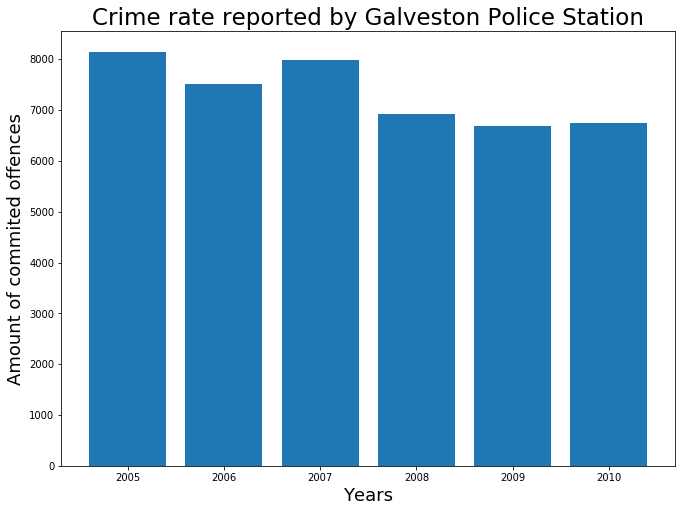

In [5]:
# creating bar chart for each year and reviewing data

plt.figure(figsize=(11,8))
plt.bar(years, offence_amount)
plt.xlabel ("Years", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Crime rate reported by Galveston Police Station",  fontsize=23)
plt.savefig ("../data/cleaned_data/galveston_crime_yearly.png")


In [6]:
# Adding new column which will hold only month of the incident
# counting amount of offences each month 
offense_data_grouped = {}
for year in years:
    offense_data[year]["month"] = offense_data[year]["incident_date"].str[5:7]
    offense_data_grouped[year] = offense_data[year].groupby(offense_data[year]["month"]).incident_date.count()

monthly_offenses_df = pd.DataFrame(offense_data_grouped)
monthly_offenses_df

,2005,2006,2007,2008,2009,2010
month,,,,,,
01,619,630,633,499,481,509
02,541,545,579,547,484,462
03,658,611,687,621,444,632
04,773,644,701,719,512,547
05,772,748,744,635,637,581
06,694,669,791,661,611,607
07,773,702,755,710,674,657
08,813,656,703,761,657,695
09,579,620,637,375,587,592


In [7]:
# calculating mean for 2005-2007 (befor hurricane) and 2009-2010 (after hurricane)
monthly_offenses_df["mean_2005-2007"] = (monthly_offenses_df[2005]+monthly_offenses_df[2006]+monthly_offenses_df[2007])/3
monthly_offenses_df["mean_2009-2010"] = (monthly_offenses_df[2009]+monthly_offenses_df[2010])/2
monthly_offenses_df

,2005,2006,2007,2008,2009,2010,mean_2005-2007,mean_2009-2010
month,,,,,,,,
01,619,630,633,499,481,509,627.333333,495.0
02,541,545,579,547,484,462,555.000000,473.0
03,658,611,687,621,444,632,652.000000,538.0
04,773,644,701,719,512,547,706.000000,529.5
05,772,748,744,635,637,581,754.666667,609.0
06,694,669,791,661,611,607,718.000000,609.0
07,773,702,755,710,674,657,743.333333,665.5
08,813,656,703,761,657,695,724.000000,676.0
09,579,620,637,375,587,592,612.000000,589.5


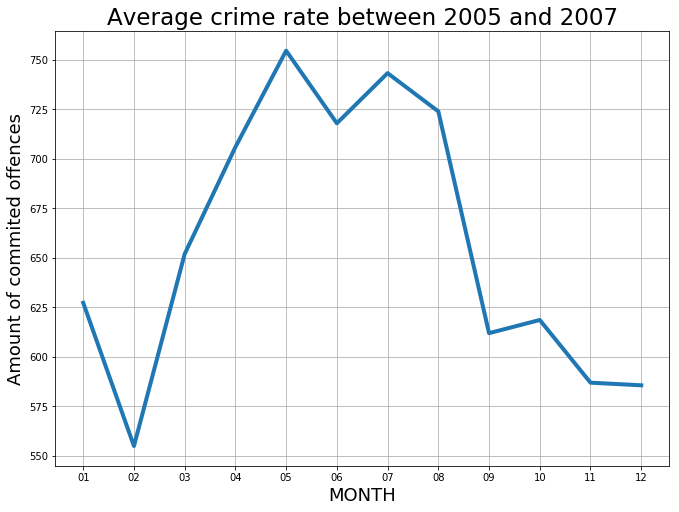

In [8]:
# plotting average crime rate before hurricane

plt.figure(figsize=(11,8))
plt.plot(monthly_offenses_df["mean_2005-2007"], lw=4)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Average crime rate between 2005 and 2007",  fontsize=23)
plt.grid()
plt.savefig ("../data/cleaned_data/galveston_ave_crime_2005_2007.png")


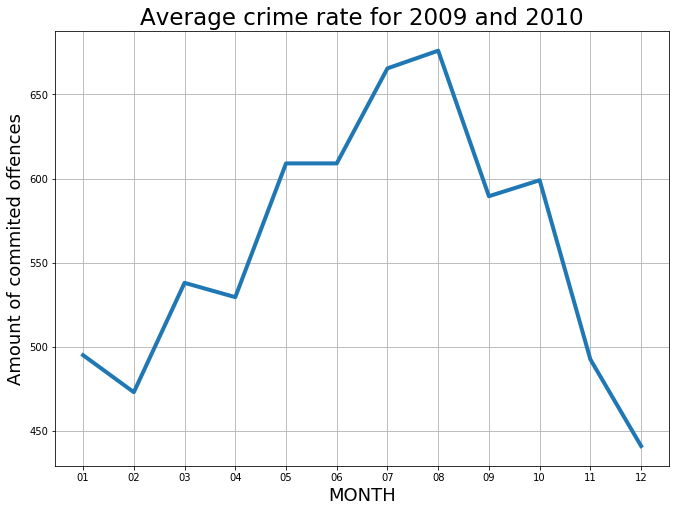

In [9]:
# plotting average crime rate after hurricane

plt.figure(figsize=(11,8))
plt.plot(monthly_offenses_df["mean_2009-2010"], lw=4)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Average crime rate for 2009 and 2010",  fontsize=23)
plt.grid()
plt.savefig ("../data/cleaned_data/galveston_ave_crime_2009_2010.png")




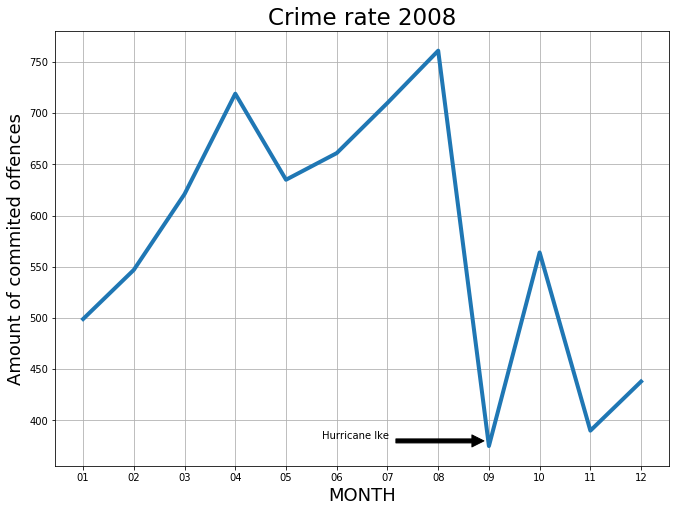

In [10]:
# plotting crime rate during hurricane Ike - 1-15 september of 2008


plt.figure(figsize=(11,8))
plt.plot(monthly_offenses_df[2008], lw=4)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Crime rate 2008",  fontsize=23)
plt.grid()



plt.annotate('Hurricane Ike',
            xy=(8, 380), xycoords='data',
            xytext=(-100, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')


plt.savefig ("../data/cleaned_data/galveston_crime_2008.png")


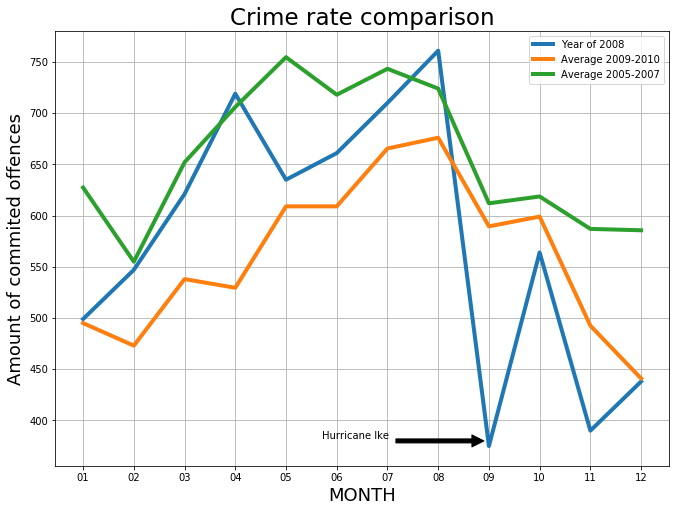

In [11]:
# Extracting data we need for final comparicing plot and creating graph
import warnings
warnings.filterwarnings('ignore')

final_plot_data = monthly_offenses_df[[2008,"mean_2009-2010", "mean_2005-2007" ]]
final_plot_data.rename(columns={2008:"Year of 2008", "mean_2009-2010":"Average 2009-2010", "mean_2005-2007":"Average 2005-2007"}, inplace=True)


plt.figure(figsize=(11,8))
plt.plot(final_plot_data, lw=4)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Crime rate comparison",  fontsize=23)
plt.grid()
plt.legend(final_plot_data)

plt.annotate('Hurricane Ike',
            xy=(8, 380), xycoords='data',
            xytext=(-100, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')


plt.savefig ("../data/cleaned_data/galveston_crime_comparison.png")




In [12]:
# Reading cleaned data for VA

offense_data = {}
offence_amount =[]
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
for year in years:
    print (f"Reading data for the year: {year}")
    offense_data[year] = pd.read_csv("../data/cleaned_data/louisa_stations_" + str(year) + ".csv")
    offence_amount.append(offense_data[year].index[-1])

Reading data for the year: 2008
Reading data for the year: 2009
Reading data for the year: 2010
Reading data for the year: 2011
Reading data for the year: 2012
Reading data for the year: 2013
Reading data for the year: 2014


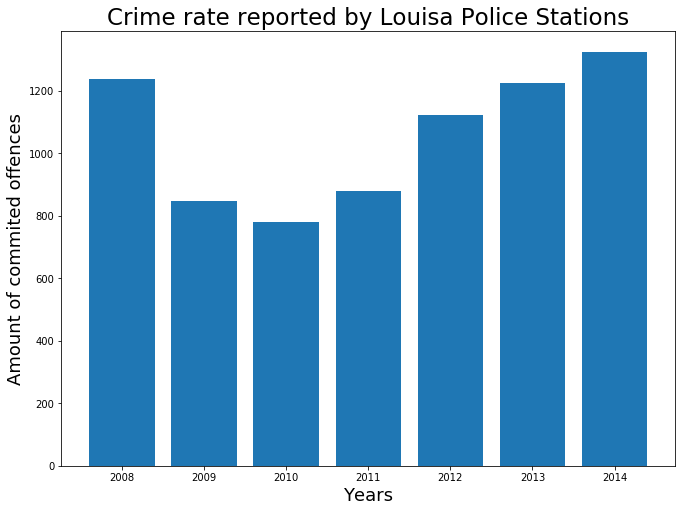

In [13]:
# creating bar chart for each year and reviewing data

plt.figure(figsize=(11,8))
plt.bar(years, offence_amount)
plt.xlabel ("Years", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Crime rate reported by Louisa Police Stations",  fontsize=23)
plt.savefig ("../data/cleaned_data/Louisa_crime_yearly.png")

In [14]:
# Adding new column which will hold only month of the incident
# counting amount of offences each month 
offense_data_grouped = {}
for year in years:
    offense_data[year]["month"] = offense_data[year]["incident_date"].str[5:7]
    offense_data_grouped[year] = offense_data[year].groupby(offense_data[year]["month"]).incident_date.count()

monthly_offenses_df = pd.DataFrame(offense_data_grouped)
monthly_offenses_df

,2008,2009,2010,2011,2012,2013,2014
month,,,,,,,
01,107,86,63,75,19,108,103
02,97,62,15,82,79,78,87
03,91,108,26,91,50,115,118
04,90,96,39,90,108,92,98
05,105,135,61,81,120,100,125
06,106,50,91,69,100,98,123
07,117,27,95,78,118,111,121
08,124,56,82,70,123,113,116
09,93,58,73,58,114,91,107


In [15]:
# calculating mean for 2008-2010 (befor earthquake) and 2012-2014 (after hurricane)
monthly_offenses_df["mean_2008-2010"] = (monthly_offenses_df[2008]+monthly_offenses_df[2009]+monthly_offenses_df[2010])/3
monthly_offenses_df["mean_2012-2014"] = (monthly_offenses_df[2012]+monthly_offenses_df[2013]+monthly_offenses_df[2014])/3
monthly_offenses_df

,2008,2009,2010,2011,2012,2013,2014,mean_2008-2010,mean_2012-2014
month,,,,,,,,,
01,107,86,63,75,19,108,103,85.333333,76.666667
02,97,62,15,82,79,78,87,58.000000,81.333333
03,91,108,26,91,50,115,118,75.000000,94.333333
04,90,96,39,90,108,92,98,75.000000,99.333333
05,105,135,61,81,120,100,125,100.333333,115.000000
06,106,50,91,69,100,98,123,82.333333,107.000000
07,117,27,95,78,118,111,121,79.666667,116.666667
08,124,56,82,70,123,113,116,87.333333,117.333333
09,93,58,73,58,114,91,107,74.666667,104.000000


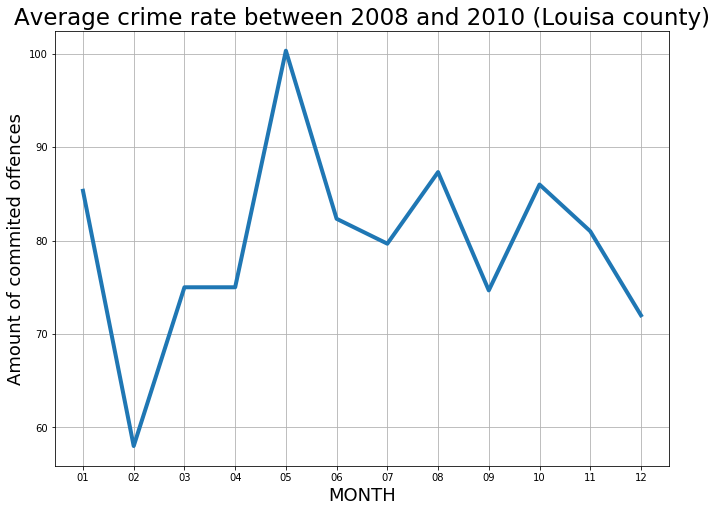

In [16]:
# plotting average crime rate before earthquake

plt.figure(figsize=(11,8))
plt.plot(monthly_offenses_df["mean_2008-2010"], lw=4)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Average crime rate between 2008 and 2010 (Louisa county)",  fontsize=23)
plt.grid()
plt.savefig ("../data/cleaned_data/louisa_ave_crime_2008_2010.png")


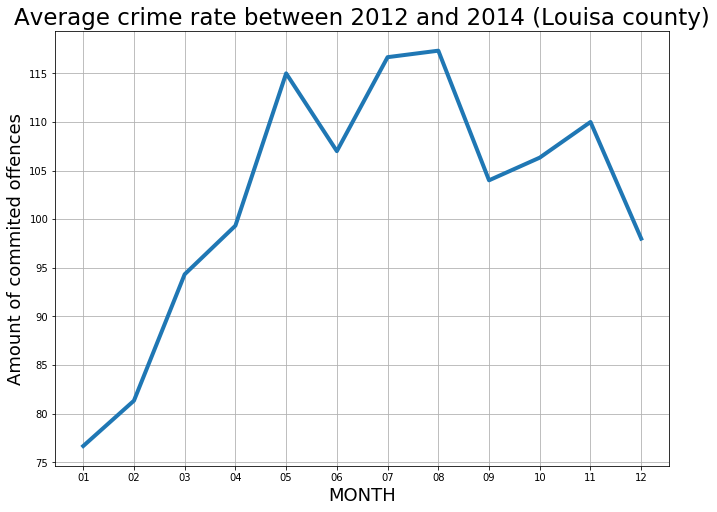

In [17]:
# plotting average crime rate after earthquake

plt.figure(figsize=(11,8))
plt.plot(monthly_offenses_df["mean_2012-2014"], lw=4)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Average crime rate between 2012 and 2014 (Louisa county)",  fontsize=23)
plt.grid()
plt.savefig ("../data/cleaned_data/louisa_ave_crime_2012_2014.png")


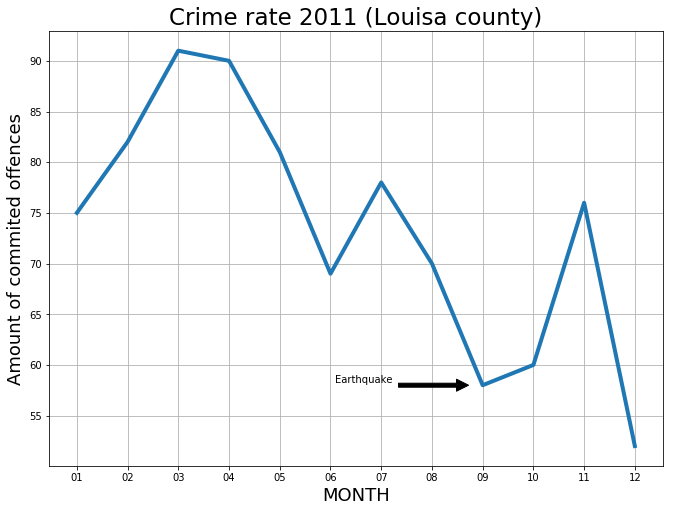

In [18]:
# plotting crime rate during earthquake - 23 august 2011


plt.figure(figsize=(11,8))
plt.plot(monthly_offenses_df[2011], lw=4)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Crime rate 2011 (Louisa county)",  fontsize=23)
plt.grid()

plt.annotate('Earthquake',
            xy=(7.8, 58), xycoords='data',
            xytext=(-80, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')


plt.savefig ("../data/cleaned_data/louisa_crime_2011.png")


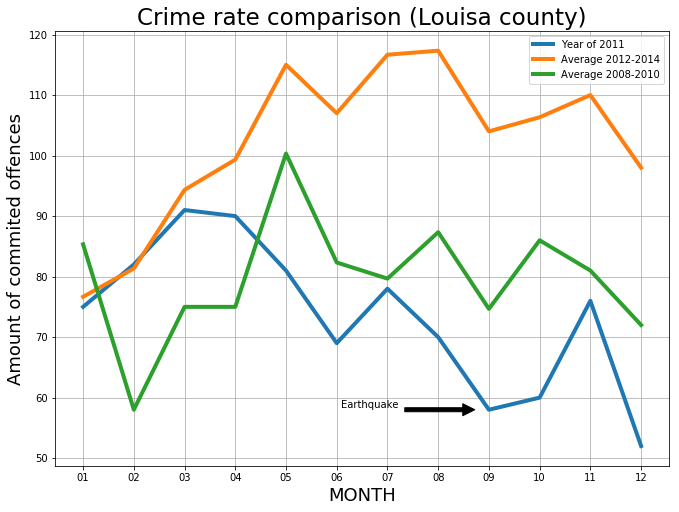

In [19]:
# Extracting data we need for final comparicing plot and creating graph
import warnings
warnings.filterwarnings('ignore')

final_plot_data = monthly_offenses_df[[2011,"mean_2012-2014", "mean_2008-2010" ]]
final_plot_data.rename(columns={2011:"Year of 2011", "mean_2012-2014":"Average 2012-2014", "mean_2008-2010":"Average 2008-2010"}, inplace=True)


plt.figure(figsize=(11,8))
plt.plot(final_plot_data, lw=4)
plt.xlabel ("MONTH", fontsize=18)
plt.ylabel ("Amount of commited offences", fontsize=18)
plt.title ("Crime rate comparison (Louisa county)",  fontsize=23)
plt.grid()
plt.legend(final_plot_data)

plt.annotate('Earthquake',
            xy=(7.8, 58), xycoords='data',
            xytext=(-80, 0), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

plt.savefig ("../data/cleaned_data/louisa_crime_comparison.png")


PART 3 KUNDYZ

In [21]:
# Save config information
gal_url1 = 'https://api.census.gov/data/2000/pep/int_population?get='

# Build query URL
gal_query_url1 = gal_url1 + "POP,GEONAME&for=PLACE:28068&in=state:48&DATE=6,7,8,9,10,11&key=" + census_api_key
gal_response1 = requests.get(gal_query_url1)
gal_response_json1 = gal_response1.json()
print(gal_response_json1)

[['POP', 'GEONAME', 'DATE', 'state', 'place'], ['53950', 'Galveston city, Texas', '6', '48', '28068'], ['53122', 'Galveston city, Texas', '7', '48', '28068'], ['52141', 'Galveston city, Texas', '8', '48', '28068'], ['51181', 'Galveston city, Texas', '9', '48', '28068'], ['50281', 'Galveston city, Texas', '10', '48', '28068'], ['48374', 'Galveston city, Texas', '11', '48', '28068']]


In [22]:
# Convert to DataFrame
galveston_df1 = pd.DataFrame(gal_response_json1)

# String replace index
gal_new_header1 = galveston_df1.iloc[0]
galveston_df1 = galveston_df1[1:]
galveston_df1.columns = gal_new_header1
galveston_df1

,POP,GEONAME,DATE,state,place
1,53950,"Galveston city, Texas",6,48,28068
2,53122,"Galveston city, Texas",7,48,28068
3,52141,"Galveston city, Texas",8,48,28068
4,51181,"Galveston city, Texas",9,48,28068
5,50281,"Galveston city, Texas",10,48,28068
6,48374,"Galveston city, Texas",11,48,28068


In [23]:
# Save config information
gal_url2 = 'https://api.census.gov/data/2017/pep/population?get='

# Build query URL
gal_query_url2 = gal_url2 + "POP,GEONAME&for=PLACE:28068&in=state:48&DATE=3,4,5,6,7,8&key=" + census_api_key
gal_response2 = requests.get(gal_query_url2)
gal_response_json2 = gal_response2.json()
print(gal_response_json2)

[['POP', 'GEONAME', 'DATE', 'state', 'place'], ['47795', 'Galveston city, Texas', '3', '48', '28068'], ['47567', 'Galveston city, Texas', '4', '48', '28068'], ['48125', 'Galveston city, Texas', '5', '48', '28068'], ['48711', 'Galveston city, Texas', '6', '48', '28068'], ['49322', 'Galveston city, Texas', '7', '48', '28068'], ['49765', 'Galveston city, Texas', '8', '48', '28068']]


In [24]:
# Convert to DataFrame
galveston_df2 = pd.DataFrame(gal_response_json2)

# String replace index
gal_new_header2 = galveston_df2.iloc[0]
galveston_df2 = galveston_df2[1:]
galveston_df2.columns = gal_new_header2
galveston_df2

,POP,GEONAME,DATE,state,place
1,47795,"Galveston city, Texas",3,48,28068
2,47567,"Galveston city, Texas",4,48,28068
3,48125,"Galveston city, Texas",5,48,28068
4,48711,"Galveston city, Texas",6,48,28068
5,49322,"Galveston city, Texas",7,48,28068
6,49765,"Galveston city, Texas",8,48,28068


In [25]:
# Rename headers
galveston_df1 = galveston_df1.rename(columns={'POP': 'Population',
                                              'GEONAME': 'City, State',
                                              'DATE': 'Year',
                                              'state': 'State',
                                              'place': 'City'})
galveston_df1

,Population,"City, State",Year,State,City
1,53950,"Galveston city, Texas",6,48,28068
2,53122,"Galveston city, Texas",7,48,28068
3,52141,"Galveston city, Texas",8,48,28068
4,51181,"Galveston city, Texas",9,48,28068
5,50281,"Galveston city, Texas",10,48,28068
6,48374,"Galveston city, Texas",11,48,28068


In [26]:
# Rename headers
galveston_df2 = galveston_df2.rename(columns={'POP': 'Population',
                                              'GEONAME': 'City, State',
                                              'DATE': 'Year',
                                              'state': 'State',
                                              'place': 'City'})
galveston_df2

,Population,"City, State",Year,State,City
1,47795,"Galveston city, Texas",3,48,28068
2,47567,"Galveston city, Texas",4,48,28068
3,48125,"Galveston city, Texas",5,48,28068
4,48711,"Galveston city, Texas",6,48,28068
5,49322,"Galveston city, Texas",7,48,28068
6,49765,"Galveston city, Texas",8,48,28068


In [27]:
# Replace values
galveston_df1['Year'] = galveston_df1['Year'].replace({'6':'2004', '7':'2005', '8':'2006', '9':'2007', '10':'2008', '11':'2009'})
galveston_df1["Year"] = pd.to_numeric(galveston_df1["Year"])
galveston_df1["Population"] = pd.to_numeric(galveston_df1["Population"])
galveston_df1

,Population,"City, State",Year,State,City
1,53950,"Galveston city, Texas",2004,48,28068
2,53122,"Galveston city, Texas",2005,48,28068
3,52141,"Galveston city, Texas",2006,48,28068
4,51181,"Galveston city, Texas",2007,48,28068
5,50281,"Galveston city, Texas",2008,48,28068
6,48374,"Galveston city, Texas",2009,48,28068


In [28]:
# Replace values
galveston_df2['Year'] = galveston_df2['Year'].replace({'3':'2010', '4':'2011', '5':'2012', '6':'2013', '7':'2014', '8':'2015'})
galveston_df2["Year"] = pd.to_numeric(galveston_df2["Year"])
galveston_df2["Population"] = pd.to_numeric(galveston_df2["Population"])
galveston_df2

,Population,"City, State",Year,State,City
1,47795,"Galveston city, Texas",2010,48,28068
2,47567,"Galveston city, Texas",2011,48,28068
3,48125,"Galveston city, Texas",2012,48,28068
4,48711,"Galveston city, Texas",2013,48,28068
5,49322,"Galveston city, Texas",2014,48,28068
6,49765,"Galveston city, Texas",2015,48,28068


In [29]:
# Remove columns
galveston_df1.drop(columns=['State', 'City'])

,Population,"City, State",Year
1,53950,"Galveston city, Texas",2004
2,53122,"Galveston city, Texas",2005
3,52141,"Galveston city, Texas",2006
4,51181,"Galveston city, Texas",2007
5,50281,"Galveston city, Texas",2008
6,48374,"Galveston city, Texas",2009


In [30]:
# Remove columns
galveston_df2.drop(columns=['State', 'City'])

,Population,"City, State",Year
1,47795,"Galveston city, Texas",2010
2,47567,"Galveston city, Texas",2011
3,48125,"Galveston city, Texas",2012
4,48711,"Galveston city, Texas",2013
5,49322,"Galveston city, Texas",2014
6,49765,"Galveston city, Texas",2015


In [31]:
# Combine DataFrames
galveston_df = pd.concat([galveston_df1, galveston_df2])
galveston_df

,Population,"City, State",Year,State,City
1,53950,"Galveston city, Texas",2004,48,28068
2,53122,"Galveston city, Texas",2005,48,28068
3,52141,"Galveston city, Texas",2006,48,28068
4,51181,"Galveston city, Texas",2007,48,28068
5,50281,"Galveston city, Texas",2008,48,28068
6,48374,"Galveston city, Texas",2009,48,28068
1,47795,"Galveston city, Texas",2010,48,28068
2,47567,"Galveston city, Texas",2011,48,28068
3,48125,"Galveston city, Texas",2012,48,28068
4,48711,"Galveston city, Texas",2013,48,28068


In [32]:
# Remove columns
galveston_df.drop(columns=['State', 'City'])

,Population,"City, State",Year
1,53950,"Galveston city, Texas",2004
2,53122,"Galveston city, Texas",2005
3,52141,"Galveston city, Texas",2006
4,51181,"Galveston city, Texas",2007
5,50281,"Galveston city, Texas",2008
6,48374,"Galveston city, Texas",2009
1,47795,"Galveston city, Texas",2010
2,47567,"Galveston city, Texas",2011
3,48125,"Galveston city, Texas",2012
4,48711,"Galveston city, Texas",2013


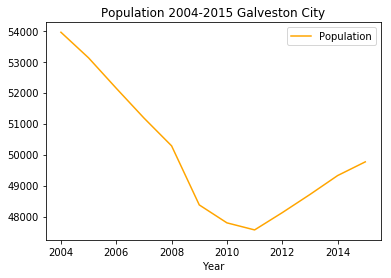

In [33]:
# Plot the graph
plot = galveston_df.plot(x='Year', y='Population', kind='line', title='Population 2004-2015 Galveston City', legend=True, color='orange')

In [34]:
# Save in PNG
fig = plot.get_figure()
fig.savefig('../data/cleaned_data/Population_2004-2015_Galveston_City.png')

In [35]:
# Save config information
lou_url1 = 'https://api.census.gov/data/2000/pep/int_population?get='

# Build query URL
lou_query_url1 = lou_url1 + "POP,GEONAME&for=COUNTY:109&in=state:51&DATE=6,7,8,9,10,11&key=" + census_api_key
lou_response1 = requests.get(lou_query_url1)
lou_response_json1 = lou_response1.json()
print(lou_response_json1)

[['POP', 'GEONAME', 'DATE', 'state', 'county'], ['28582', 'Louisa County, Virginia', '6', '51', '109'], ['29835', 'Louisa County, Virginia', '7', '51', '109'], ['30946', 'Louisa County, Virginia', '8', '51', '109'], ['31716', 'Louisa County, Virginia', '9', '51', '109'], ['32475', 'Louisa County, Virginia', '10', '51', '109'], ['32840', 'Louisa County, Virginia', '11', '51', '109']]


In [36]:
# Convert to DataFrame
louisa_df1 = pd.DataFrame(lou_response_json1)

# String replace index
lou_new_header1 = louisa_df1.iloc[0]
louisa_df1 = louisa_df1[1:]
louisa_df1.columns = lou_new_header1
louisa_df1

,POP,GEONAME,DATE,state,county
1,28582,"Louisa County, Virginia",6,51,109
2,29835,"Louisa County, Virginia",7,51,109
3,30946,"Louisa County, Virginia",8,51,109
4,31716,"Louisa County, Virginia",9,51,109
5,32475,"Louisa County, Virginia",10,51,109
6,32840,"Louisa County, Virginia",11,51,109


In [37]:
# Save config information
lou_url2 = 'https://api.census.gov/data/2017/pep/population?get='

# Build query URL
lou_query_url2 = lou_url2 + "POP,GEONAME&for=COUNTY:109&in=state:51&DATE=3,4,5,6,7,8&key=" + census_api_key
lou_response2 = requests.get(lou_query_url2)
lou_response_json2 = lou_response2.json()
print(lou_response_json2)

[['POP', 'GEONAME', 'DATE', 'state', 'county'], ['33310', 'Louisa County, Virginia', '3', '51', '109'], ['33461', 'Louisa County, Virginia', '4', '51', '109'], ['33499', 'Louisa County, Virginia', '5', '51', '109'], ['33993', 'Louisa County, Virginia', '6', '51', '109'], ['34319', 'Louisa County, Virginia', '7', '51', '109'], ['34618', 'Louisa County, Virginia', '8', '51', '109']]


In [38]:
# Convert to DataFrame
louisa_df2 = pd.DataFrame(lou_response_json2)

# String replace index
lou_new_header2 = louisa_df2.iloc[0]
louisa_df2 = louisa_df2[1:]
louisa_df2.columns = lou_new_header2
louisa_df2

,POP,GEONAME,DATE,state,county
1,33310,"Louisa County, Virginia",3,51,109
2,33461,"Louisa County, Virginia",4,51,109
3,33499,"Louisa County, Virginia",5,51,109
4,33993,"Louisa County, Virginia",6,51,109
5,34319,"Louisa County, Virginia",7,51,109
6,34618,"Louisa County, Virginia",8,51,109


In [39]:
# Rename headers
louisa_df1 = louisa_df1.rename(columns={'POP': 'Population',
                                        'GEONAME': 'County, State',
                                        'DATE': 'Year',
                                        'state': 'State',
                                        'county': 'County'})
louisa_df1

,Population,"County, State",Year,State,County
1,28582,"Louisa County, Virginia",6,51,109
2,29835,"Louisa County, Virginia",7,51,109
3,30946,"Louisa County, Virginia",8,51,109
4,31716,"Louisa County, Virginia",9,51,109
5,32475,"Louisa County, Virginia",10,51,109
6,32840,"Louisa County, Virginia",11,51,109


In [40]:
# Rename headers
louisa_df2 = louisa_df2.rename(columns={'POP': 'Population',
                                        'GEONAME': 'County, State',
                                        'DATE': 'Year',
                                        'state': 'State',
                                        'county': 'County'})
louisa_df2

,Population,"County, State",Year,State,County
1,33310,"Louisa County, Virginia",3,51,109
2,33461,"Louisa County, Virginia",4,51,109
3,33499,"Louisa County, Virginia",5,51,109
4,33993,"Louisa County, Virginia",6,51,109
5,34319,"Louisa County, Virginia",7,51,109
6,34618,"Louisa County, Virginia",8,51,109


In [41]:
# Replace values
louisa_df1['Year'] = louisa_df1['Year'].replace({'6':'2004', '7':'2005', '8':'2006', '9':'2007', '10':'2008', '11':'2009'})
louisa_df1["Year"] = pd.to_numeric(louisa_df1["Year"])
louisa_df1["Population"] = pd.to_numeric(louisa_df1["Population"])
louisa_df1

,Population,"County, State",Year,State,County
1,28582,"Louisa County, Virginia",2004,51,109
2,29835,"Louisa County, Virginia",2005,51,109
3,30946,"Louisa County, Virginia",2006,51,109
4,31716,"Louisa County, Virginia",2007,51,109
5,32475,"Louisa County, Virginia",2008,51,109
6,32840,"Louisa County, Virginia",2009,51,109


In [42]:
# Replace values
louisa_df2['Year'] = louisa_df2['Year'].replace({'3':'2010', '4':'2011', '5':'2012', '6':'2013', '7':'2014', '8':'2015'})
louisa_df2["Year"] = pd.to_numeric(louisa_df2["Year"])
louisa_df2["Population"] = pd.to_numeric(louisa_df2["Population"])
louisa_df2

,Population,"County, State",Year,State,County
1,33310,"Louisa County, Virginia",2010,51,109
2,33461,"Louisa County, Virginia",2011,51,109
3,33499,"Louisa County, Virginia",2012,51,109
4,33993,"Louisa County, Virginia",2013,51,109
5,34319,"Louisa County, Virginia",2014,51,109
6,34618,"Louisa County, Virginia",2015,51,109


In [43]:
# Remove columns
louisa_df1.drop(columns=['State', 'County'])

,Population,"County, State",Year
1,28582,"Louisa County, Virginia",2004
2,29835,"Louisa County, Virginia",2005
3,30946,"Louisa County, Virginia",2006
4,31716,"Louisa County, Virginia",2007
5,32475,"Louisa County, Virginia",2008
6,32840,"Louisa County, Virginia",2009


In [44]:
# Remove columns
louisa_df2.drop(columns=['State', 'County'])

,Population,"County, State",Year
1,33310,"Louisa County, Virginia",2010
2,33461,"Louisa County, Virginia",2011
3,33499,"Louisa County, Virginia",2012
4,33993,"Louisa County, Virginia",2013
5,34319,"Louisa County, Virginia",2014
6,34618,"Louisa County, Virginia",2015


In [45]:
# Combine DataFrames
louisa_df = pd.concat([louisa_df1, louisa_df2])
louisa_df

,Population,"County, State",Year,State,County
1,28582,"Louisa County, Virginia",2004,51,109
2,29835,"Louisa County, Virginia",2005,51,109
3,30946,"Louisa County, Virginia",2006,51,109
4,31716,"Louisa County, Virginia",2007,51,109
5,32475,"Louisa County, Virginia",2008,51,109
6,32840,"Louisa County, Virginia",2009,51,109
1,33310,"Louisa County, Virginia",2010,51,109
2,33461,"Louisa County, Virginia",2011,51,109
3,33499,"Louisa County, Virginia",2012,51,109
4,33993,"Louisa County, Virginia",2013,51,109


In [46]:
# Remove columns
louisa_df.drop(columns=['State', 'County'])

,Population,"County, State",Year
1,28582,"Louisa County, Virginia",2004
2,29835,"Louisa County, Virginia",2005
3,30946,"Louisa County, Virginia",2006
4,31716,"Louisa County, Virginia",2007
5,32475,"Louisa County, Virginia",2008
6,32840,"Louisa County, Virginia",2009
1,33310,"Louisa County, Virginia",2010
2,33461,"Louisa County, Virginia",2011
3,33499,"Louisa County, Virginia",2012
4,33993,"Louisa County, Virginia",2013


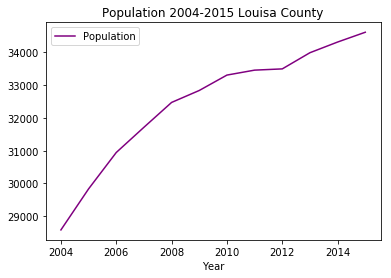

In [47]:
# Plot the graph
plot = louisa_df.plot(x='Year', y='Population', kind='line', title='Population 2004-2015 Louisa County', legend=True, color='purple')

In [48]:
# Save in PNG
fig = plot.get_figure()
fig.savefig('../data/cleaned_data/Population_2004-2015_Louisa_County.png')

PART 4 MARIAM

All Median Household Income data analysis was done within Excel